# create a NER model on amazon customer review with 3 entities 
# mail priyansh.mishra@celebaltech.com 

In [34]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
food_reviews_df=pd.read_csv('Reviews.csv')
food_reviews_df.shape

(568454, 10)

In [37]:
food_reviews_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir"""
HelpfulnessNumerator,1,0,1,3,0
HelpfulnessDenominator,1,0,1,3,0
Score,5,1,4,2,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...


In [38]:
food_reviews_df = food_reviews_df[['Text','Score']].dropna()

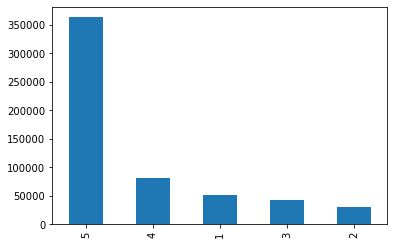

In [39]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

In [40]:
food_reviews_df.Score[food_reviews_df.Score<=3]=0
food_reviews_df.Score[food_reviews_df.Score>=4]=1

C:\Users\hp\AppData\Local\Temp/ipykernel_15280/1090184200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_reviews_df.Score[food_reviews_df.Score<=3]=0
C:\Users\hp\AppData\Local\Temp/ipykernel_15280/1090184200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_reviews_df.Score[food_reviews_df.Score>=4]=1


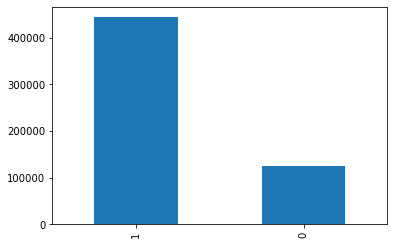

In [41]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score_boolean.png");

In [42]:
food_reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [43]:
train_pos_df=food_reviews_df[food_reviews_df.Score==1][:50000]
train_neg_df=food_reviews_df[food_reviews_df.Score==0][:50000]

In [44]:
train_df=train_pos_df.append(train_neg_df)
train_df.shape

(100000, 2)

In [45]:
val_pos_df=food_reviews_df[food_reviews_df.Score==1][50000:60000]
val_neg_df=food_reviews_df[food_reviews_df.Score==0][50000:60000]
val_df=val_pos_df.append(val_neg_df)
val_df.shape

(20000, 2)

In [46]:
spacy_tok = spacy.load('en_core_web_sm')
sample_review=food_reviews_df.Text[54]
sample_review

"I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively."

In [47]:
parsed_review = spacy_tok(sample_review)
parsed_review

I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively.

In [50]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,I,I,PRON,PRP,nsubj,X,True,True,False
1,roast,"(roast,)",VERB,VBP,ROOT,xxxx,True,False,False
2,at,"(at,)",ADP,IN,prep,xx,True,True,False
3,home,"(home,)",NOUN,NN,pobj,xxxx,True,False,False
4,with,"(with,)",ADP,IN,prep,xxxx,True,True,False
5,a,"(a,)",DET,DT,det,x,True,True,False
6,stove,"(stove,)",NOUN,NN,nmod,xxxx,True,False,False
7,-,"(-,)",PUNCT,HYPH,punct,-,False,False,True
8,top,"(top,)",NOUN,NN,pobj,xxx,True,True,False
9,popcorn,"(popcorn,)",NOUN,NN,compound,xxxx,True,False,False


In [51]:
spacy.displacy.render(parsed_review, style='ent', jupyter=True)

In [53]:
spacy.explain('GPE') 

'Countries, cities, states'